In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
plt.style.use('default')
pd.options.display.max_rows = 20
%matplotlib inline

stripi = pd.read_csv('obdelani-podatki/stripi.csv', index_col='id')
avtorji = pd.read_csv('obdelani-podatki/avtorji.csv', index_col='id')
zalozbe = pd.read_csv('obdelani-podatki/izdajatelji.csv', index_col='id')
avtorji_in_zalozbe = pd.read_csv('obdelani-podatki/avtorji-izdajatelji.csv', index_col='strip')

In [2]:
stripi_s_ceno = stripi.dropna()
stripi_po_letih = stripi_s_ceno.groupby("leto")
povprecna_cena_po_letih = stripi_po_letih.sedanja_cena.mean()
stripi_s_ceno["razlika"] = stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena
povprecna_razlika_po_letih = stripi_po_letih.razlika.mean()

stripi_po_avtorjih = stripi_s_ceno.groupby("avtor")
povprecna_cena_na_avtorja = stripi_po_avtorjih.sedanja_cena.mean()
stevilo_stripov_na_avtorja = stripi.groupby("avtor").size().sort_values(0) #zanimajo nas tudi stripi, ki nimajo podane cene

/var/folders/mz/g14tn3n56tjcg8bxsy2yhwf80000gn/T/ipykernel_9401/1213131394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stripi_s_ceno["razlika"] = stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena
/var/folders/mz/g14tn3n56tjcg8bxsy2yhwf80000gn/T/ipykernel_9401/1213131394.py:9: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  stevilo_stripov_na_avtorja = stripi.groupby("avtor").size().sort_values(0) #zanimajo nas tudi stripi, ki nimajo podane cene


In [3]:
stripi_s_ceno["relativno_znizanje"] = (stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena)/stripi_s_ceno.prejsnja_cena * 100
relativna_cena_glede_na_avtorje_max = stripi_s_ceno.groupby("avtor").relativno_znizanje.mean().sort_values(ascending=False).head(15)
relativna_cena_glede_na_avtorje_min = stripi_s_ceno.groupby("avtor").relativno_znizanje.mean().sort_values().head(15)


/var/folders/mz/g14tn3n56tjcg8bxsy2yhwf80000gn/T/ipykernel_9401/3956682984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stripi_s_ceno["relativno_znizanje"] = (stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena)/stripi_s_ceno.prejsnja_cena * 100


<AxesSubplot: xlabel='avtor'>

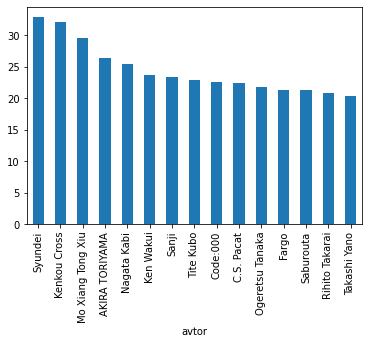

In [4]:
relativna_cena_glede_na_avtorje_max.plot.bar()

<AxesSubplot: xlabel='avtor'>

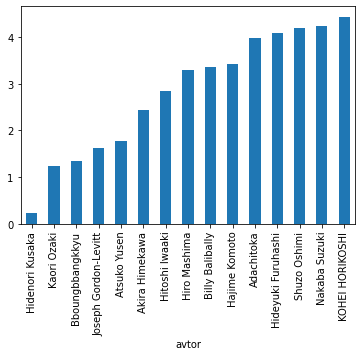

In [5]:
relativna_cena_glede_na_avtorje_min.plot.bar()

<AxesSubplot: xlabel='leto'>

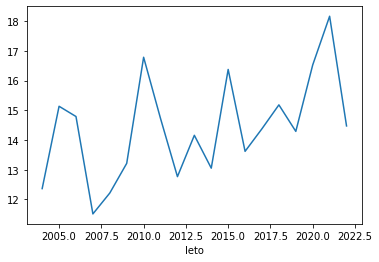

In [6]:
povprecna_cena_po_letih.plot()

In [7]:
zalozbe_avtorji_stripi = pd.merge(avtorji_in_zalozbe, stripi, left_on ="strip" , right_on = "id")
zalozbe_avtorji_stripi_imena = pd.merge(zalozbe_avtorji_stripi, zalozbe, left_on="izdajatelj", right_on="id")

stevilo_po_zalozbah = zalozbe_avtorji_stripi_imena.groupby("izdajatelj_y").count()[["izdajatelj_x"]]
cena_po_zalozbah = zalozbe_avtorji_stripi_imena.groupby("izdajatelj_y").sedanja_cena.mean()
cena_in_stevilo = pd.merge(cena_po_zalozbah, stevilo_po_zalozbah, left_on = "izdajatelj_y", right_on = "izdajatelj_y")

cena_pod_deset = stripi_s_ceno[stripi_s_ceno.prejsnja_cena <= 10.0].groupby("leto").count()[["naslov"]][6:]
cena_med_deset_in_dvajset = stripi_s_ceno[(stripi_s_ceno.prejsnja_cena <= 20.0) & (stripi_s_ceno.prejsnja_cena > 10.0)].groupby("leto").count()[["naslov"]][11:]
cena_nad_dvajset = stripi_s_ceno[stripi_s_ceno.prejsnja_cena > 20.0].groupby("leto").count()[["naslov"]][6:]

cena_skupaj = pd.merge(cena_pod_deset, cena_med_deset_in_dvajset, left_on="leto", right_on="leto")
cene_skupaj_vse = pd.merge(cena_skupaj, cena_nad_dvajset, left_on="leto", right_on="leto")

cene_skupaj_vse.rename(columns = {'naslov_x':'cena_pod_deset'}, inplace = True)
cene_skupaj_vse.rename(columns = {'naslov_y':'cena_med_deset_in_dvajset'}, inplace = True)
cene_skupaj_vse.rename(columns = {'naslov':'cena_nad_dvajset'}, inplace = True)

<AxesSubplot: xlabel='leto'>

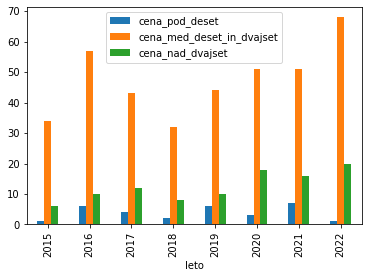

In [8]:
cene_skupaj_vse.plot.bar()

<AxesSubplot: xlabel='izdajatelj_y'>

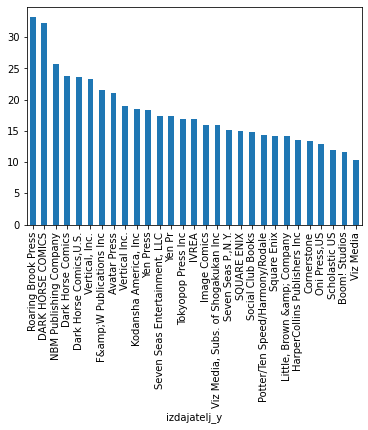

In [9]:
cena_po_zalozbah.sort_values(ascending=False).plot.bar(x='naslov', y='zasluzek')

<AxesSubplot: xlabel='naslov'>

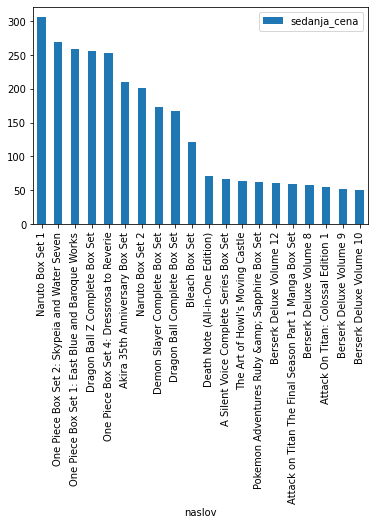

In [10]:
stripi.sort_values("sedanja_cena", ascending=False).head(20).plot.bar(x='naslov', y='sedanja_cena')

In [11]:
#najvec izvodov avtorji
najvec_avtorji = zalozbe_avtorji_stripi_imena.groupby("avtor_y").count().sort_values("naslov", ascending=False).head(20)["naslov"]
najvec_avtorji
#najvec_avtorji.plot.bar()

avtor_y
Eiichiro Oda         58
Kentaro Miura        53
Hajime Isayama       45
Haruichi Furudate    36
Hirohiko Araki       28
Kohei Horikoshi      27
Sui Ishida           24
Yoshihiro Togashi    23
Koyoharu Gotouge     23
Tsugumi Ohba         22
Akira Toriyama       21
Kaiu Shirai          20
Tomohito Oda         18
Gege Akutami         18
Masashi Kishimoto    17
ONE                  17
Q Hayashida          17
Tatsuki Fujimoto     17
Junji Ito            14
AIDAIRO              14
Name: naslov, dtype: int64

<AxesSubplot: xlabel='izdajatelj_y'>

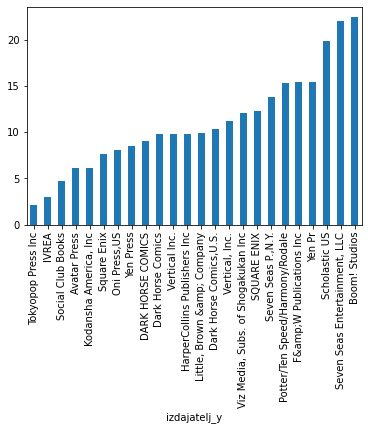

In [12]:
stripi_relativno_znizanje_zalozbe = pd.merge(stripi_s_ceno, zalozbe_avtorji_stripi_imena, left_on="naslov", right_on="naslov")
stripi_relativno_znizanje_po_zalozbah = stripi_relativno_znizanje_zalozbe.groupby("izdajatelj_y").relativno_znizanje.mean()

stripi_relativno_znizanje_po_zalozbah.sort_values().plot.bar()

Text(0, 0.5, '')

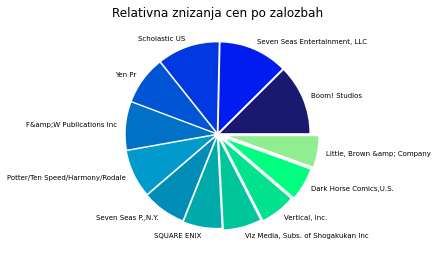

In [13]:
plt.rcParams['figure.figsize'] = [4,5]
colors = ['#191970', '#001CF0','#0038E2', '#0055D4', '#0071C6', '#009ACD', '#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80', '#90EE90']
stripi_relativno_znizanje_po_zalozbah.sort_values(ascending = False).head(12).plot.pie(
    explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.035, 0.04, 0.05, 0.07, 0.09, 0.11, 0.13,),
    colors = colors,
    title = 'Relativna znizanja cen po zalozbah',
    textprops={'fontsize': 7})
pylab.ylabel('')
#Sprememba barv, belo ozadje

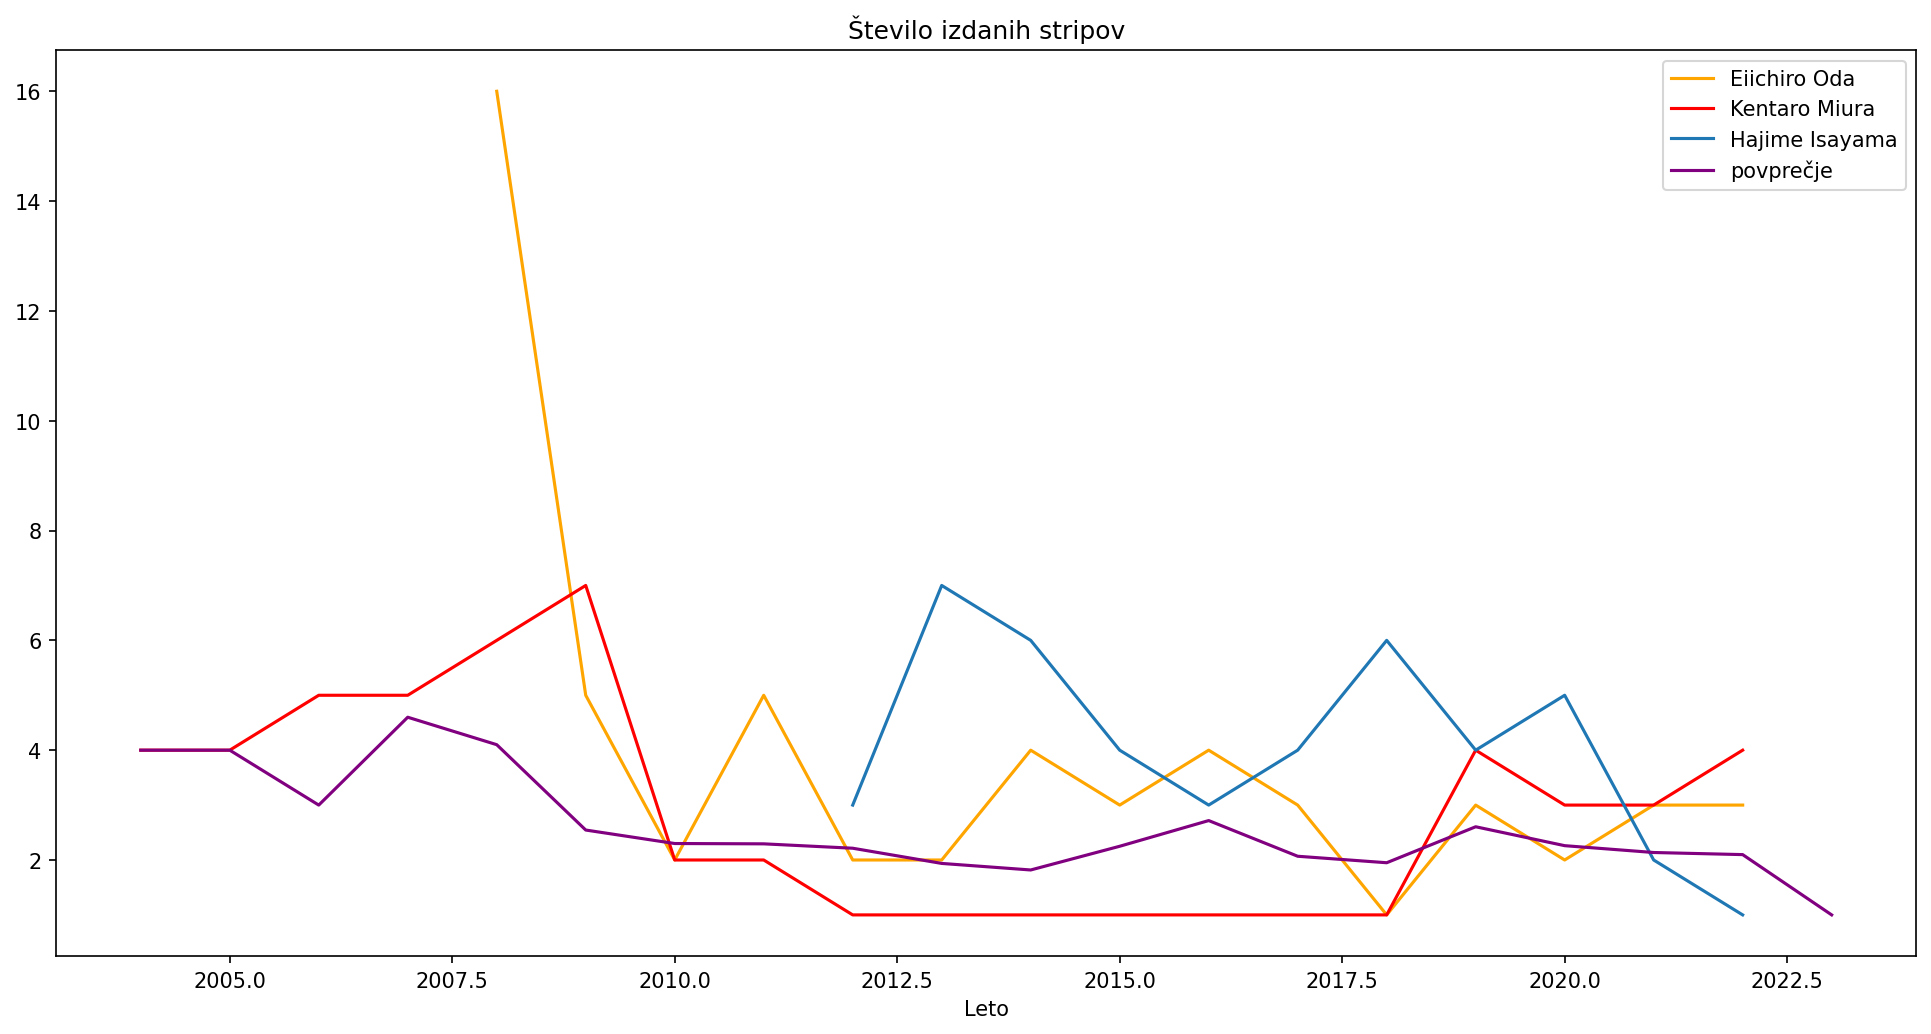

In [34]:
najbolj_prodajani_1 = zalozbe_avtorji_stripi_imena[(zalozbe_avtorji_stripi_imena.avtor_y == "Eiichiro Oda")]
najbolj_prodajani_2 = zalozbe_avtorji_stripi_imena[(zalozbe_avtorji_stripi_imena.avtor_y == "Kentaro Miura")]
najbolj_prodajani_3 = zalozbe_avtorji_stripi_imena[(zalozbe_avtorji_stripi_imena.avtor_y == "Hajime Isayama")]

st_vseh_izvodov_po_letih = zalozbe_avtorji_stripi_imena.groupby("leto").count()["naslov"] #stevilo razlicnih izvodov po letih
st_avtorjev_po_letih = zalozbe_avtorji_stripi_imena.groupby("leto").nunique() #stevlo razlicnih avtorjev
povprecno_stevilo_izvodov = pd.merge(st_vseh_izvodov_po_letih, st_avtorjev_po_letih, left_on="leto", right_on="leto")[["naslov_x", "avtor_x"]]
povprecno_stevilo_izvodov["Povprečno število novo izdanih stripov"] = povprecno_stevilo_izvodov.naslov_x / povprecno_stevilo_izvodov.avtor_x

plt.figure(figsize=(16, 8), dpi=150)
  
najbolj_prodajani_1.groupby("leto").naslov.count().plot(label='Eiichiro Oda', color='orange')
najbolj_prodajani_2.groupby("leto").naslov.count().plot(label='Kentaro Miura', color='red')
najbolj_prodajani_3.groupby("leto").naslov.count().plot(label='Hajime Isayama')
povprecno_stevilo_izvodov["Povprečno število novo izdanih stripov"].plot(label="povprečje", color="purple")
  
plt.title('Število izdanih stripov')
  
plt.xlabel('Leto')
  
plt.legend()

/var/folders/mz/g14tn3n56tjcg8bxsy2yhwf80000gn/T/ipykernel_9401/1600822106.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  povprecna_cena_avtorjih = stripi_s_ceno.groupby("avtor").mean()[["sedanja_cena"]]


<AxesSubplot: xlabel='avtor'>

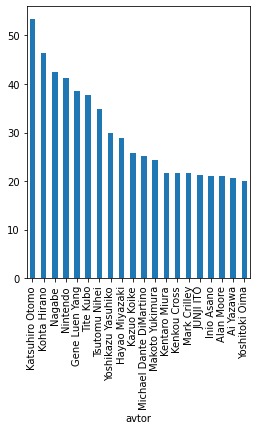

In [15]:
povprecna_cena_avtorjih = stripi_s_ceno.groupby("avtor").mean()[["sedanja_cena"]]
povprecna_cena_avtorjih.sedanja_cena.sort_values(ascending=False).head(20).plot.bar()